Joao Paulo Chen  -  n.º USP 11297718

# Trabalho 1

### Objetivo do trabalho:
Análise exploratória usando técnicas de visualização computacional de uma base de dados
utilizando as técnicas estudadas até a Aula 06.

### Requisitos do trabalho:
1. A base de dados deve possuir no mínimo 1000 instâncias e 10 atributos.
2. A base de dados deve possuir atributos categóricos e ordinais/numéricos.
3. Aplique o pré-processamento que considerar adequado e justifique.
4. Escolha os top-5 atributos para análise via scatter-plot.
5. Aplique cluster nos dados e utilize as informações de cluster juntamente com coordenadas paralelas (para colorir a visualização)
6. Aplique também coordenadas paralelas considerando apenas os dados categóricos.
7. Construa uma rede k-nn (KNNG) e analise a base de dados. Pode utilizar os clusters gerados para apoiar a análise.
8. Crie uma mapa bidimensional por meio de Redes SOM. Explique os resultados que obteve.
9. Realize uma projeção via PCA utilizando os atributos ordinais/numéricos. Mostre as duas componentes principais e avalie.

### Dados:
dataset: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
<br>
<br>Car details v3:

1. Name: Name of the cars
2. Year: Year of the car when it was bought
3. Selling_price: Price at which the car is being sold
4. Km_driven: Number of Kilometres the car is driven
5. Fuel: Fuel type of car
6. Seller_type: Tells if a Seller is Individual or a Dealer
7. Transmission: Gear transmission of the car (Automatic/Manual)
8. Owner: Number of previous owners of the car
9. Mileage: Mileage of the car
10. Engine: Engine capacity of the car
11. Max_power: Max power of engine
12. Torque: Torque of the car
13. Seats: Number of seats in the car

### Google Colab:
Notebook com Output<br>
Link: https://colab.research.google.com/drive/18GnM2Tbtc_CEX1yETayDNmtqiFvoYp38?usp=sharing

# imports

In [192]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import SimpSOM as sps

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx

pd.set_option('display.max_columns', None)

# read data

In [3]:
data = pd.read_csv(r'data/Car details v3.csv')

In [4]:
data

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage   engine  \
0     Individual       Manual           First Owner   23.4 kmpl  1248 CC   
1     Individual       Manual          Second Owner  21.14 kmpl  1498 CC   
2     Individual       Manual           Third Owner   17.7 kmpl  1497 CC   
3     Individual       Manual           First Owner   23.0 kmpl  1396 CC   
4     Individual       Manual           First Owner   16.1 kmpl  1298 CC   
...          ...          ...                   ...         ...      ...   
8123  Individual       Manual           First Owner   18.5 kmpl  1197 CC   
8124  Individual       Manual  Fourth & Above Owner   16.8 kmpl  1493 CC   
8125  Individual       Manual           First Owner   19.3 kmpl  1248 CC   
8126  Individual       Manual           First Owner  23.57 kmpl  1396 CC   
8127  Individual       Manual           First Owner  23.57 kmpl  1396 CC   

       max_power                     torque  seats  
0         74 bhp             190Nm@ 2000rpm    5.0  
1     103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2         78 bhp      12.7@ 2,700(kgm@ rpm)    5.0  
3         90 bhp   22.4 kgm at 1750-2750rpm    5.0  
4       88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
...          ...                        ...    ...  
8123   82.85 bhp           113.7Nm@ 4000rpm    5.0  
8124     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
8125    73.9 bhp             190Nm@ 2000rpm    5.0  
8126      70 bhp        140Nm@ 1800-3000rpm    5.0  
8127      70 bhp        140Nm@ 1800-3000rpm    5.0  

[8128 rows x 13 columns]

# Preparaçao da base

<font size="4">**1. Informaçoes do dadaset**</font>

In [14]:
# Dimensoes do dataset
data.shape

(8128, 13)

In [15]:
# Colunas do dataset
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [6]:
# Informações sobre as colunas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Quantidade de Nan por coluna
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [16]:
# Valores únicos de cada coluna e sua quantidade
for i in data.columns:
    print(i)
    print('')
    print(data[i].value_counts())
    print('--------------------------------------------')

name

Maruti Swift Dzire VDI                  129
Maruti Alto 800 LXI                      82
Maruti Alto LXi                          71
BMW X4 M Sport X xDrive20d               62
Maruti Swift VDI                         61
                                       ... 
Toyota Innova Crysta 2.4 ZX AT            1
Honda Civic ZX                            1
Maruti Eeco Smiles 7 Seater Standard      1
Ford Freestyle Titanium Diesel            1
Toyota Fortuner 2.8 2WD MT                1
Name: name, Length: 2058, dtype: int64
--------------------------------------------
year

2017    1018
2016     859
2018     807
2015     776
2013     670
2012     651
2014     621
2011     592
2019     583
2010     394
2009     246
2008     214
2007     183
2006     124
2005      97
2020      74
2004      62
2003      49
2002      27
2000      22
1999      18
1997      11
1998      10
2001      10
1994       3
1996       3
1995       2
1991       1
1983       1
Name: year, dtype: int64
------------------

<font size="4">**2. Tratamendo dos valores faltantes (Nan)**</font>

In [20]:
# Dataframe com quantidade de Nan por colunas
nulos = pd.concat([data.isnull().sum(), round((data.isnull().sum()/data.shape[0])*100, 2)], axis = 1).reset_index()
nulos.columns = ["coluna", "absoluto", "porcentagem"]
nulos 

coluna  absoluto  porcentagem
0            name         0         0.00
1            year         0         0.00
2   selling_price         0         0.00
3       km_driven         0         0.00
4            fuel         0         0.00
5     seller_type         0         0.00
6    transmission         0         0.00
7           owner         0         0.00
8         mileage       221         2.72
9          engine       221         2.72
10      max_power       215         2.65
11         torque       222         2.73
12          seats       221         2.72

In [23]:
# Vou retirar todas as observações com valores faltantes (Nan), pois é apenas 2% dos dados
data.dropna(inplace=True)

In [24]:
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

<font size="4">**3. Drop de colunas**</font>

In [25]:
#Vou remover a coluna torque, pois tem vários valores com uma estrutura complexa para ser tratada
data.drop(columns=['torque'], inplace = True)

<font size="4">**4. Tratamento das colunas**</font>

- Criar uma coluna com o modelo dos carros
- Tratar as colunas mileage, engine e max_power

In [27]:
# Criando a coluna brand, que é a primeira palavra no nome dos carros
data['brand'] = data['name'].str.split(' ').str[0]

In [31]:
# Transformando as colunas Mileage, Engine e Max_power em variáveis numéricas
data['mileage'] = data['mileage'].str.replace(r'\D', '').astype(int)
data['engine'] = data['engine'].str.replace(r'\D', '').astype(int)
data['max_power'] = data['max_power'].str.replace(r'\D', '').astype(int)

<ipython-input-31-2914e53571e7>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['mileage'] = data['mileage'].str.replace(r'\D', '').astype(int)
<ipython-input-31-2914e53571e7>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['engine'] = data['engine'].str.replace(r'\D', '').astype(int)
<ipython-input-31-2914e53571e7>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['max_power'] = data['max_power'].str.replace(r'\D', '').astype(int)


In [33]:
data.head()

name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner  mileage  engine  \
0     Individual       Manual           First Owner      234    1248   
1     Individual       Manual          Second Owner     2114    1498   
2     Individual       Manual           Third Owner      177    1497   
3     Individual       Manual           First Owner      230    1396   
4     Individual       Manual           First Owner      161    1298   
...          ...          ...                   ...      ...     ...   
8123  Individual       Manual           First Owner      185    1197   
8124  Individual       Manual  Fourth & Above Owner      168    1493   
8125  Individual       Manual           First Owner      193    1248   
8126  Individual       Manual           First Owner     2357    1396   
8127  Individual       Manual           First Owner     2357    1396   

      max_power  seats    brand  
0            74    5.0   Maruti  
1         10352    5.0    Skoda  
2            78    5.0    Honda  
3            90    5.0  Hyundai  
4           882    5.0   Maruti  
...         ...    ...      ...  
8123       8285    5.0  Hyundai  
8124        110    5.0  Hyundai  
8125        739    5.0   Maruti  
8126         70    5.0     Tata  
8127         70    5.0     Tata  

[7906 rows x 13 columns]

<font size="4">**5. Tratamento das variáveis categóricas**</font>

In [48]:
# Converte os valores das variáveis categóricas para numérico
df = data.copy()
lbl = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = lbl.fit_transform(df[i])

In [49]:
df.head()

name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0     1249  2014         450000     145500     1            1             1   
1     1546  2014         370000     120000     1            1             1   
2      375  2006         158000     140000     3            1             1   
3      743  2010         225000     127000     1            1             1   
4     1290  2007         130000     120000     3            1             1   
...    ...   ...            ...        ...   ...          ...           ...   
8123   733  2013         320000     110000     3            1             1   
8124   618  2007         135000     119000     1            1             1   
8125  1261  2009         382000     120000     1            1             1   
8126  1633  2013         290000      25000     1            1             1   
8127  1633  2013         290000      25000     1            1             1   

      owner  mileage  engine  max_power  seats  brand  
0         0      234    1248         74    5.0     20  
1         2     2114    1498      10352    5.0     26  
2         4      177    1497         78    5.0     10  
3         0      230    1396         90    5.0     11  
4         0      161    1298        882    5.0     20  
...     ...      ...     ...        ...    ...    ...  
8123      0      185    1197       8285    5.0     11  
8124      1      168    1493        110    5.0     11  
8125      0      193    1248        739    5.0     20  
8126      0     2357    1396         70    5.0     27  
8127      0     2357    1396         70    5.0     27  

[7906 rows x 13 columns]

# Vizualizaçao dos dados

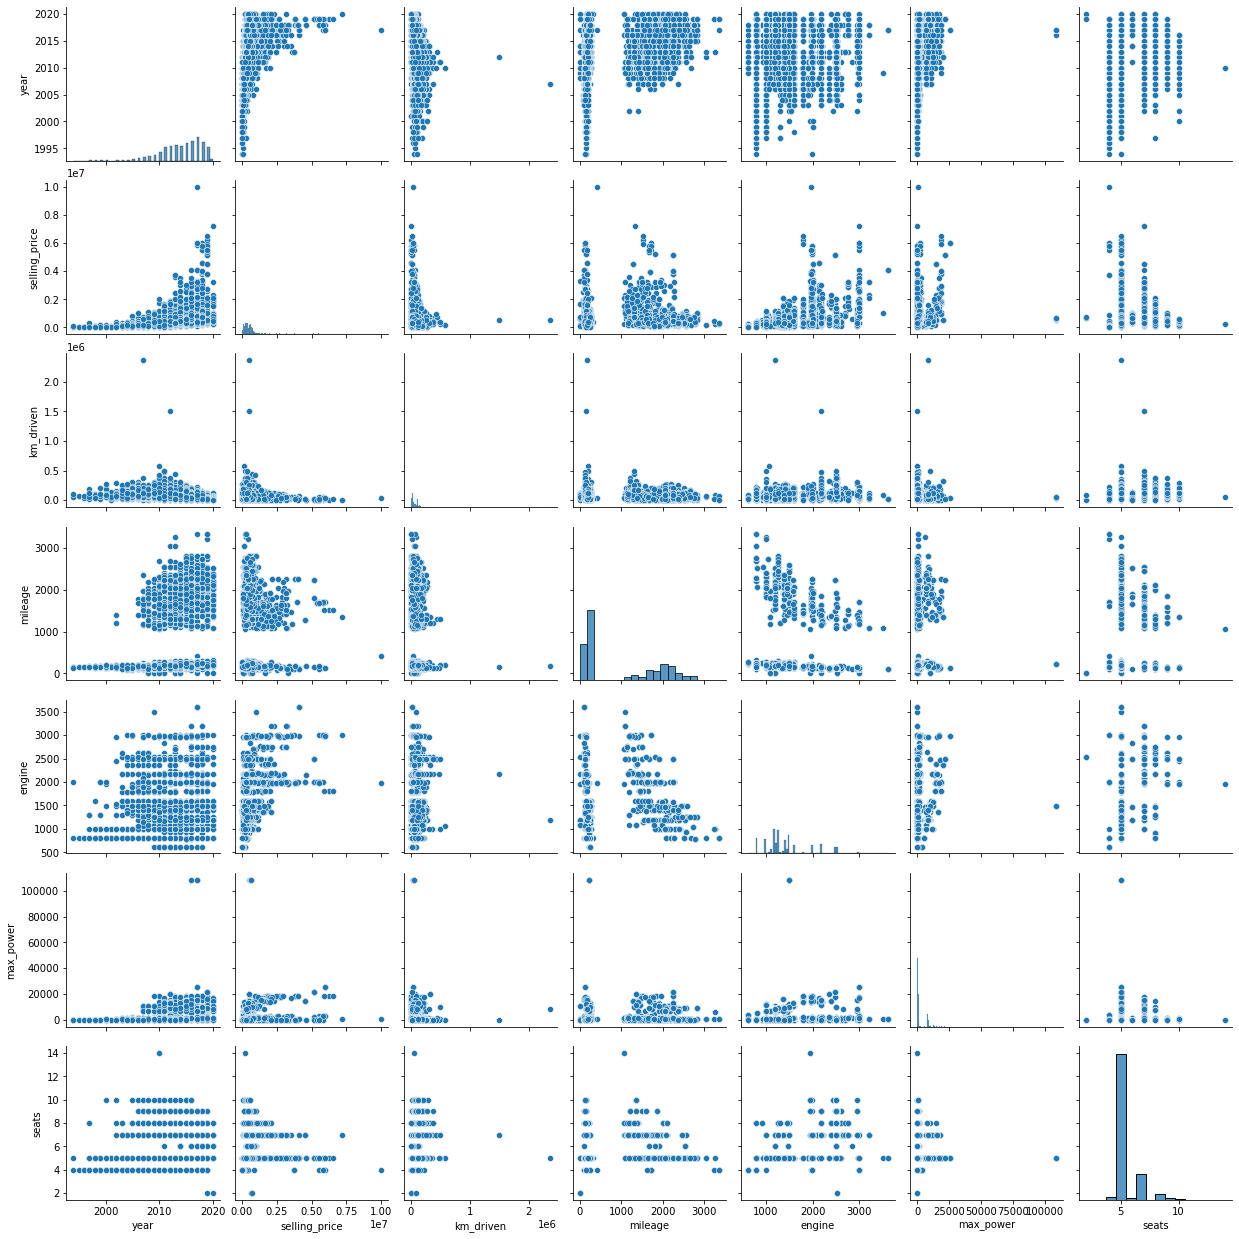

In [39]:
sns.pairplot(data=data)
plt.show()

In [41]:
# Matriz de Correlaçao
data.corr()

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.412302  -0.428548  0.248093  0.018263   
selling_price  0.412302       1.000000  -0.222158  0.098988  0.455682   
km_driven     -0.428548      -0.222158   1.000000 -0.079957  0.206031   
mileage        0.248093       0.098988  -0.079957  1.000000 -0.035105   
engine         0.018263       0.455682   0.206031 -0.035105  1.000000   
max_power      0.248152       0.137042  -0.111612  0.093732  0.025356   
seats         -0.007923       0.041617   0.227259 -0.016067  0.611103   

               max_power     seats  
year            0.248152 -0.007923  
selling_price   0.137042  0.041617  
km_driven      -0.111612  0.227259  
mileage         0.093732 -0.016067  
engine          0.025356  0.611103  
max_power       1.000000 -0.071018  
seats          -0.071018  1.000000

<font size="4">**Scatter-plot**</font>

<font size="4">Primeiro, vou selecionar os top 5 atributos utilizando SelectKBest</font>

In [50]:
# Dividindo o dataset em X e y
X = df.drop(columns=['selling_price'])
y = df.loc[:,'selling_price']

In [51]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

f_classif = SelectKBest(score_func=f_classif, k=5)
fit = f_classif.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
cols = fit.get_support(indices=True)
df_selec = df.iloc[:,cols]

In [55]:
df_selec

year  fuel  seller_type  mileage  engine
0     2014     1            1      234    1248
1     2014     1            1     2114    1498
2     2006     3            1      177    1497
3     2010     1            1      230    1396
4     2007     3            1      161    1298
...    ...   ...          ...      ...     ...
8123  2013     3            1      185    1197
8124  2007     1            1      168    1493
8125  2009     1            1      193    1248
8126  2013     1            1     2357    1396
8127  2013     1            1     2357    1396

[7906 rows x 5 columns]

In [56]:
# Top 5 atributos selecionado pelo SelectKBest
df.columns[cols]

Index(['year', 'fuel', 'seller_type', 'mileage', 'engine'], dtype='object')

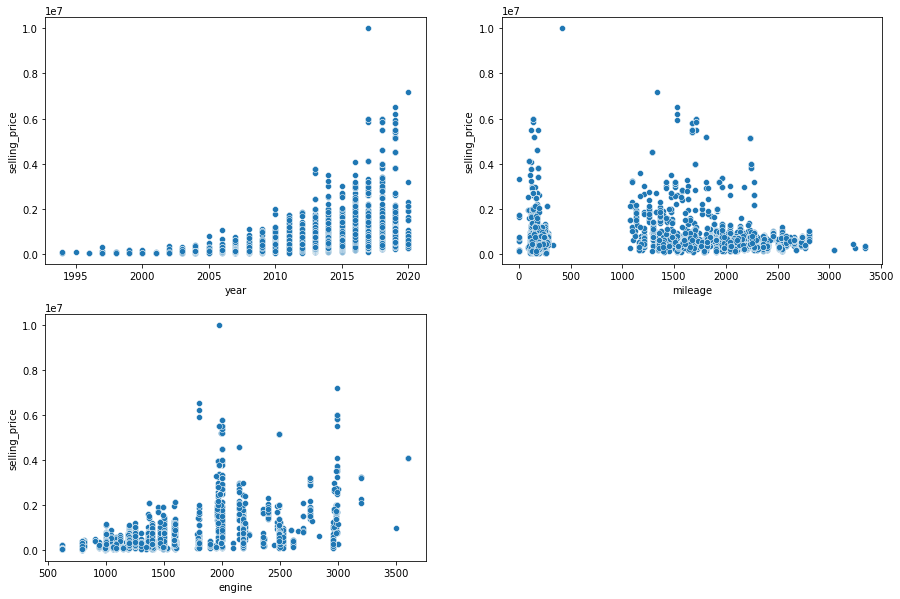

In [111]:
numplot = 1
plt.figure(figsize=(15,10))
for i in ['year','mileage', 'engine']:
    plt.subplot(2,2,numplot)
    sns.scatterplot(data=data, x=i, y = 'selling_price')
    numplot += 1
plt.show()

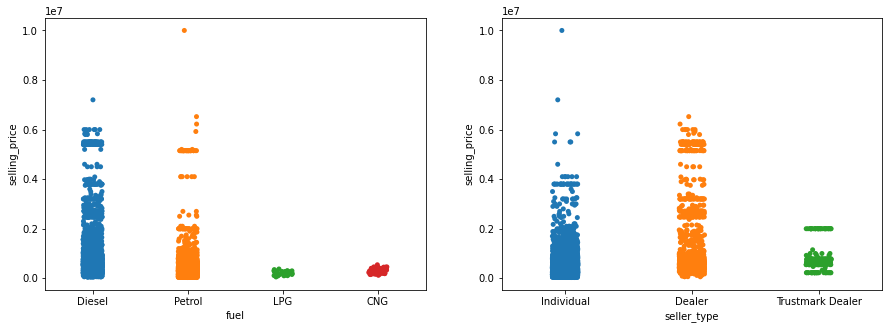

In [110]:
fig, axs = plt.subplots (1, 2, figsize=(15, 5))
sns.stripplot(data=data, x='fuel', y = 'selling_price', ax=axs[0])
sns.stripplot(data=data, x='seller_type', y = 'selling_price', ax=axs[1])
plt.show()

<font size="4">**Cluster e Redes Paralelas**</font>

In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,n_init=10,init='random',max_iter=300)
kmeans.fit(df.drop(columns=['selling_price']))

KMeans(init='random', n_clusters=4)

In [119]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0  153]
 [   1 1433]
 [   2 2956]
 [   3 3364]]


In [147]:
data['cluster'] = kmeans.labels_

In [148]:
data.head()

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  \
0  Individual       Manual   First Owner      234    1248         74    5.0   
1  Individual       Manual  Second Owner     2114    1498      10352    5.0   
2  Individual       Manual   Third Owner      177    1497         78    5.0   
3  Individual       Manual   First Owner      230    1396         90    5.0   
4  Individual       Manual   First Owner      161    1298        882    5.0   

     brand  cluster  
0   Maruti        1  
1    Skoda        1  
2    Honda        1  
3  Hyundai        1  
4   Maruti        1

In [146]:
ordem = ['seats','km_driven','engine','max_power','mileage','year','cluster','selling_price']
fig = px.parallel_coordinates(data.loc[:,ordem], color='cluster')
fig.show()

In [153]:
# Coordenadas Paralelas para Atributos Categóricos
px.parallel_categories(data, color='cluster')

<font size="4">**K-NN (KNNG)**</font>

In [156]:
A = kneighbors_graph(X, n_neighbors=7, metric="euclidean")
A.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

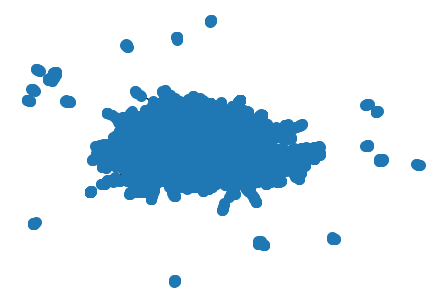

In [201]:
G = nx.Graph(A)
nx.draw(G, node_size=100, pos=nx.spring_layout(G))

<font size="4">**Redes SOM**</font>

In [197]:
sc = StandardScaler()
df_st = sc.fit_transform(df.drop(columns=['selling_price']))

Periodic Boundary Conditions inactive.
The weights will be initialised randomly.
Training SOM... done!


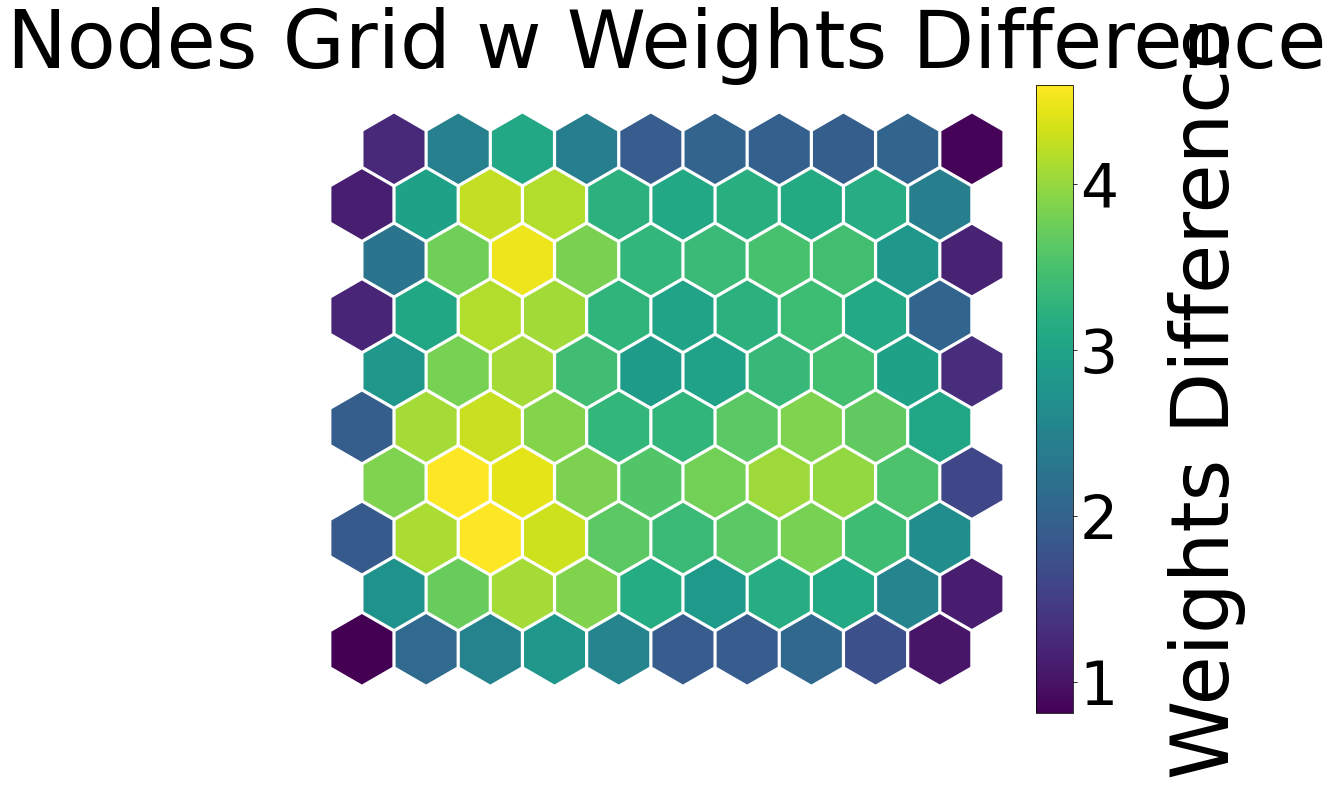

<Figure size 432x288 with 0 Axes>

In [199]:
# build a network 
som = sps.somNet(10, 10, df_st)

# learning rate / num epochs
som.train(0.1, 500)

# print unified distance matrix
som.diff_graph(show=True)

<font size="4">**PCA**</font>

In [168]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(columns=['selling_price']))
df_pca = pd.DataFrame(df_pca)
df_pca

0            1
0     76335.412039 -1922.441629
1     50729.957116  8124.010513
2     70835.453447 -1975.584339
3     57836.110567 -2095.839561
4     50828.777421 -1376.513316
...            ...          ...
7901  40752.917460  5921.869165
7902  49836.498446 -2158.420548
7903  50830.081930 -1519.256635
7904 -44160.064361 -3125.085921
7905 -44160.064361 -3125.085921

[7906 rows x 2 columns]

<font size="4">Scatter Plot do Dataset - 2 Componentes Principais</font>

In [172]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    df_pca,
    labels=labels,
    dimensions=range(2),
    color=data['cluster']
)
fig.update_traces(diagonal_visible=False)
fig.show()

<font size="4">Normalizaçao</font>

In [185]:
mms = MinMaxScaler()
df_norm = mms.fit_transform(df.drop(columns=['selling_price']))
pca = PCA(n_components=2)
components = pca.fit_transform(df_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=data['cluster'])
fig.update_traces(diagonal_visible=False)
fig.show()